<a href="https://colab.research.google.com/github/sunshineluyao/CV_ML/blob/master/Kmeans/BTC_Clustering90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd 
import numpy as np

In [46]:
###show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [47]:
df=pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/Fintech_AI/master/data/BTC_2020_07_05.csv')
df.head()

,Unnamed: 0,BlkCnt,IssTotNtv,SplyCur,TxTfrValAdjUSD,CapMrktCurUSD,NVTAdj90,PriceUSD,FeeTotUSD,IssTotUSD,AdrActCnt,Volume,Type,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1year,1-2year,2-3year,3-5year,>5year,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Five-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility
0,2009-01-03,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#set "date" column as the index
df.set_index('Unnamed: 0', inplace=True)
#to remove the name of the index
df.index.name=None
df.tail()

,BlkCnt,IssTotNtv,SplyCur,TxTfrValAdjUSD,CapMrktCurUSD,NVTAdj90,PriceUSD,FeeTotUSD,IssTotUSD,AdrActCnt,Volume,Type,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1year,1-2year,2-3year,3-5year,>5year,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Five-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility
2020-06-28,150.0,937.50,1.841734e+07,1.044929e+09,1.677464e+11,84.965505,9108.065675,178764.564868,8.538812e+06,686270.0,1.456087e+10,BTC,1.883975,1.560580e+10,21.670843,8.717576e+06,1.854689e+10,52.718677,4.709665e+11,1.933909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027537,0.031297,0.033409,0.033409,NaN,NaN
2020-06-29,145.0,906.25,1.841825e+07,1.825444e+09,1.691578e+11,85.628193,9184.247366,308429.074080,8.323224e+06,962232.0,1.646055e+10,BTC,1.879341,1.828599e+10,21.383505,8.631653e+06,1.855552e+10,53.691440,9.258904e+11,0.991937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027077,0.031259,0.033407,0.033407,NaN,NaN
2020-06-30,147.0,918.75,1.841917e+07,2.063592e+09,1.684243e+11,84.979256,9143.967585,407570.997824,8.401020e+06,926238.0,1.573580e+10,BTC,1.878009,1.779939e+10,21.318103,8.808591e+06,1.856433e+10,52.384807,8.579168e+11,1.065834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026666,0.031133,0.033284,0.033284,NaN,NaN
2020-07-01,162.0,1012.50,1.842018e+07,2.197590e+09,1.702271e+11,85.716151,9241.339612,573024.429645,9.356856e+06,1078007.0,1.597155e+10,BTC,1.889464,1.816914e+10,20.887828,9.929881e+06,1.857426e+10,46.966900,1.162099e+12,0.795228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021887,0.031114,0.033233,0.033233,NaN,NaN
2020-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.633892e+10,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018210,0.031087,0.033219,0.033219,NaN,NaN


In [49]:
import matplotlib.pyplot as plt
print(plt.style.available)
####Check different styles here: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-bright')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [50]:
df['PU_future90d']=df['PU Ratio'].shift(-90)
df['NVTAdj90_future90d']=df['NVTAdj90'].shift(-90)
df['PM_future90d']=df['PM'].shift(-90)


In [51]:
df['PriceChange30d']=100*df['PriceUSD'].pct_change(periods=30)
df['PriceChange60d']=100*df['PriceUSD'].pct_change(periods=60)
df['PriceChange90d']=100*df['PriceUSD'].pct_change(periods=90)
df['PriceChange180d']=100*df['PriceUSD'].pct_change(periods=180)

In [52]:
######Calculate the future return in 30, 60, 90 days
df['future30d_ROI']=df['PriceChange30d'].shift(-30)
df['future60d_ROI']=df['PriceChange60d'].shift(-60)
df['future90d_ROI']=df['PriceChange90d'].shift(-90)
df['future180d_ROI']=df['PriceChange180d'].shift(-180)

In [53]:
df_90=df[['PU Ratio','PU_future90d','NVTAdj90','NVTAdj90_future90d','future90d_ROI','PM','PM_future90d']]

In [54]:
df_90=df_90.dropna()

In [55]:
df_90.head()

,PU Ratio,PU_future90d,NVTAdj90,NVTAdj90_future90d,future90d_ROI,PM,PM_future90d
2010-10-15,0.463020,0.973481,154.643925,147.755297,202.476190,30.998689,10.989619
2010-10-16,0.418576,1.519027,144.681892,184.130860,296.029709,11.602674,15.203635
2010-10-17,0.434648,1.393589,147.263082,175.883298,278.431373,18.085074,19.008926
2010-10-18,0.432816,1.387447,145.972987,174.852775,277.724609,11.418262,17.167769
2010-10-19,0.391168,1.125454,137.869691,156.588954,258.296568,4.899486,19.007623


In [56]:
df_90.tail()

,PU Ratio,PU_future90d,NVTAdj90,NVTAdj90_future90d,future90d_ROI,PM,PM_future90d
2019-12-24,26.601372,12.172811,73.695387,61.315945,-10.354600,1.715028,1.455861
2019-12-25,26.287368,13.134281,73.705925,63.573657,-5.786490,2.493285,1.249921
2019-12-26,26.536360,12.582958,73.984332,62.632848,-7.014538,1.687247,1.938508
2019-12-27,26.771950,12.841833,74.306351,63.264534,-6.669616,1.388866,0.853296
2019-12-28,27.081428,11.868722,75.023235,60.623003,-11.165837,1.955882,0.995063


In [57]:
from sklearn.cluster import KMeans

In [58]:
### We cluster the data by PU today and after n days
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_90[['PU Ratio','PU_future90d']])
labels90 = model.predict(df_90[['PU Ratio','PU_future90d']])
labels90.reshape(-1,1)
df_90['labels90']=labels90
df_90.head()

,PU Ratio,PU_future90d,NVTAdj90,NVTAdj90_future90d,future90d_ROI,PM,PM_future90d,labels90
2010-10-15,0.463020,0.973481,154.643925,147.755297,202.476190,30.998689,10.989619,0
2010-10-16,0.418576,1.519027,144.681892,184.130860,296.029709,11.602674,15.203635,0
2010-10-17,0.434648,1.393589,147.263082,175.883298,278.431373,18.085074,19.008926,0
2010-10-18,0.432816,1.387447,145.972987,174.852775,277.724609,11.418262,17.167769,0
2010-10-19,0.391168,1.125454,137.869691,156.588954,258.296568,4.899486,19.007623,0


In [59]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids=pd.DataFrame(centroids)
centroids.columns=['centroids_x','centroids_y']
centroids.head()

,centroids_x,centroids_y
0,17.580834,18.912288
1,439.204960,84.063374
2,61.436455,439.204960
3,96.127006,93.787794


In [60]:
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

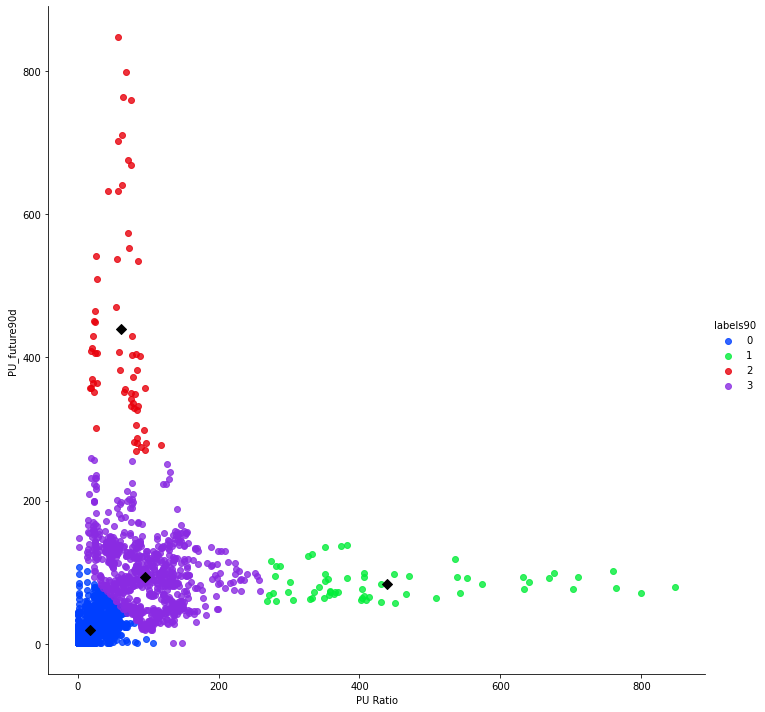

In [61]:
plt.figure(figsize=(14, 10))
sns.lmplot('PU Ratio', 'PU_future90d', data=df_90, hue='labels90', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.savefig('PU90_full')

In [62]:
df_90_ROI=df_90[['future90d_ROI','labels90']].groupby('labels90', as_index=False).agg(['min', 'max','mean','std'])
df_90_ROI.columns = ["_".join(x) for x in df_90_ROI.columns.ravel()]
df_90_ROI.index.name=None
df_90_ROI.head()

,future90d_ROI_min,future90d_ROI_max,future90d_ROI_mean,future90d_ROI_std
0,-83.710800,2602.078891,99.624817,284.165805
1,-61.350263,8.715075,-37.297839,19.283813
2,103.261022,827.458889,370.157469,210.292135
3,-76.415609,3171.652729,45.239593,199.141516


In [63]:
df90_PU=df_90[['PU Ratio', 'PU_future90d','labels90']].groupby('labels90').agg(['min', 'max','mean','std'])
df90_PU=df90_PU.transpose()
df90_PU

labels90                    0           1           2           3
PU Ratio     min     0.331285  269.334754   16.973789    1.837719
             max   106.712495  848.128885  118.238575  259.290818
             mean   17.589045  439.204960   61.436455   96.196632
             std    15.900903  149.643526   26.553127   45.046272
PU_future90d min     0.331285   56.781908  269.334754    1.278521
             max   106.712495  137.662093  848.128885  259.290818
             mean   18.936480   84.063374  439.204960   93.807897
             std    16.666008   20.651437  149.643526   46.480579

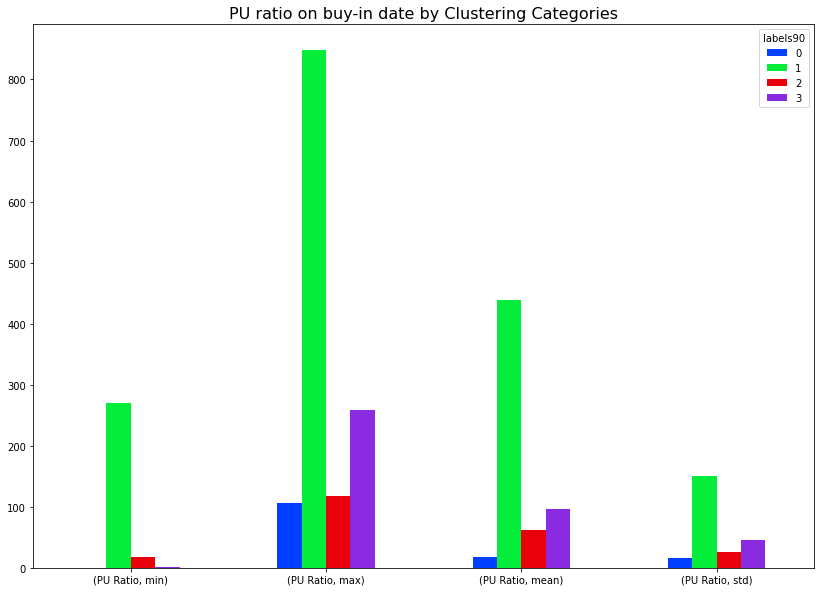

In [64]:
df90_PU.iloc[0:4].plot(kind='bar',figsize=(14, 10))
plt.title('PU ratio on buy-in date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('90PU_full_buyin')

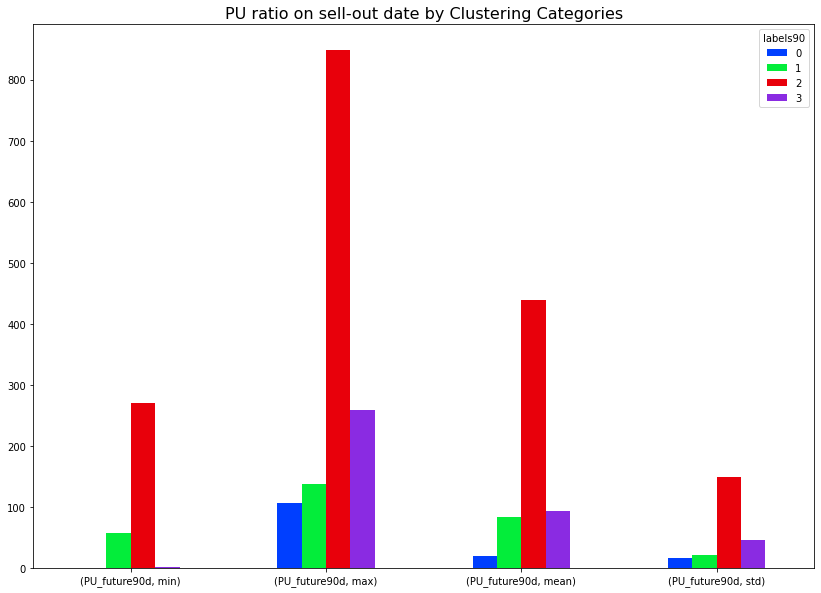

In [65]:
df90_PU.iloc[4:8].plot(kind='bar',figsize=(14, 10))
plt.title('PU ratio on sell-out date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('90PU_full_sellout')

In [66]:
df_90_ROI=df_90_ROI.transpose()
df_90_ROI.columns=['labels90=0', 'labels90=1','labels90=2', 'labels90=3']
df_90_ROI.head()

,labels90=0,labels90=1,labels90=2,labels90=3
future90d_ROI_min,-83.710800,-61.350263,103.261022,-76.415609
future90d_ROI_max,2602.078891,8.715075,827.458889,3171.652729
future90d_ROI_mean,99.624817,-37.297839,370.157469,45.239593
future90d_ROI_std,284.165805,19.283813,210.292135,199.141516


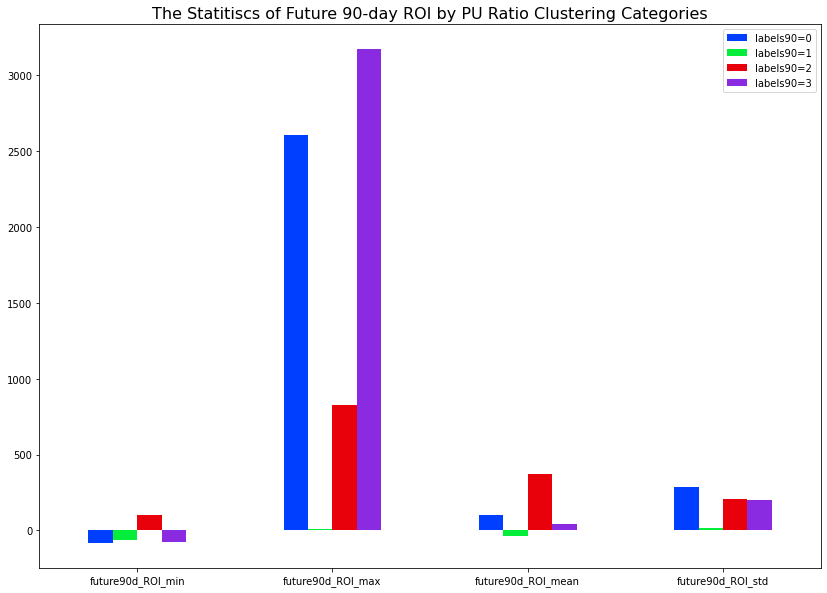

In [67]:
df_90_ROI.plot(kind='bar',figsize=(14, 10))
plt.title('The Statitiscs of Future 90-day ROI by PU Ratio Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('90ROI_full')

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

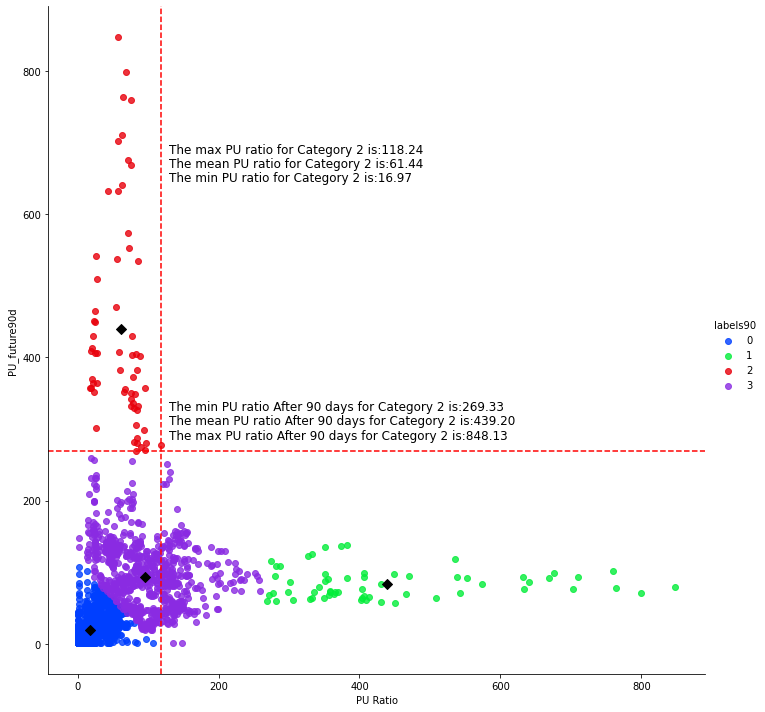

In [68]:
plt.figure(figsize=(14, 10))
sns.lmplot('PU Ratio', 'PU_future90d', data=df_90, hue='labels90', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.axvline(118.238575, color='red', linestyle='--')
plt.axhline(269.335326, color='red', linestyle='--')
plt.annotate('The max PU ratio for Category 2 is:118.24',
            xy=(130, 700), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.annotate('The mean PU ratio for Category 2 is:61.44',
            xy=(130, 680), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.annotate('The min PU ratio for Category 2 is:16.97',
            xy=(130, 660), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)

plt.annotate('The max PU ratio After 90 days for Category 2 is:848.13',
            xy=(130, 300), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.annotate('The mean PU ratio After 90 days for Category 2 is:439.20',
            xy=(130, 320), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.annotate('The min PU ratio After 90 days for Category 2 is:269.33',
            xy=(130, 340), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.savefig('PU90_full_annoted')

In [69]:
df_90.head()

,PU Ratio,PU_future90d,NVTAdj90,NVTAdj90_future90d,future90d_ROI,PM,PM_future90d,labels90
2010-10-15,0.463020,0.973481,154.643925,147.755297,202.476190,30.998689,10.989619,0
2010-10-16,0.418576,1.519027,144.681892,184.130860,296.029709,11.602674,15.203635,0
2010-10-17,0.434648,1.393589,147.263082,175.883298,278.431373,18.085074,19.008926,0
2010-10-18,0.432816,1.387447,145.972987,174.852775,277.724609,11.418262,17.167769,0
2010-10-19,0.391168,1.125454,137.869691,156.588954,258.296568,4.899486,19.007623,0


In [70]:
### We cluster the data by NVT today and after n days
### We cluster the data by PU today and after n days
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_90[['NVTAdj90','NVTAdj90_future90d']])
labels90_NVT = model.predict(df_90[['NVTAdj90','NVTAdj90_future90d']])
labels90_NVT.reshape(-1,1)
df_90['labels90_NVT']=labels90_NVT
df_90.head()

,PU Ratio,PU_future90d,NVTAdj90,NVTAdj90_future90d,future90d_ROI,PM,PM_future90d,labels90,labels90_NVT
2010-10-15,0.463020,0.973481,154.643925,147.755297,202.476190,30.998689,10.989619,0,1
2010-10-16,0.418576,1.519027,144.681892,184.130860,296.029709,11.602674,15.203635,0,1
2010-10-17,0.434648,1.393589,147.263082,175.883298,278.431373,18.085074,19.008926,0,1
2010-10-18,0.432816,1.387447,145.972987,174.852775,277.724609,11.418262,17.167769,0,1
2010-10-19,0.391168,1.125454,137.869691,156.588954,258.296568,4.899486,19.007623,0,1


In [71]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids=pd.DataFrame(centroids)
centroids.columns=['centroids_x','centroids_y']
centroids.head()

,centroids_x,centroids_y
0,43.207564,43.110544
1,175.388832,167.091708
2,67.916967,74.394682
3,135.832168,43.713159


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

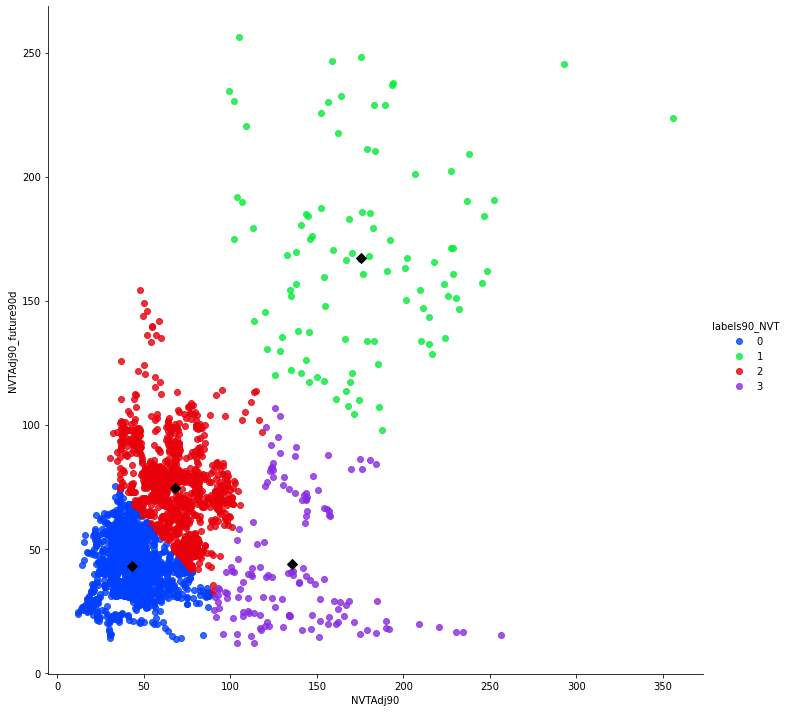

In [72]:
plt.figure(figsize=(14, 10))
sns.lmplot('NVTAdj90', 'NVTAdj90_future90d', data=df_90, hue='labels90_NVT', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.savefig('NVT90_full')

In [73]:
df_90_ROI=df_90[['future90d_ROI','labels90_NVT']].groupby('labels90_NVT', as_index=False).agg(['min', 'max','mean','std'])
df_90_ROI.columns = ["_".join(x) for x in df_90_ROI.columns.ravel()]
df_90_ROI.index.name=None
df_90_ROI.head()

,future90d_ROI_min,future90d_ROI_max,future90d_ROI_mean,future90d_ROI_std
0,-83.710800,2173.169200,66.553373,190.975457
1,102.243083,3171.652729,537.587934,592.692882
2,-56.859098,2258.089533,83.324950,300.529637
3,-76.415609,1053.449720,116.571633,195.832346


In [74]:
df90_NVT=df_90[['NVTAdj90', 'NVTAdj90_future90d','labels90_NVT']].groupby('labels90_NVT').agg(['min', 'max','mean','std'])
df90_NVT=df90_NVT.transpose()
df90_NVT

labels90_NVT                     0           1           2           3
NVTAdj90           min   11.810125   99.115684   30.383771   90.757424
                   max   89.119341  355.931337  117.960276  256.362055
                   mean  43.207564  175.388832   67.916967  135.832168
                   std   12.503944   44.482566   15.817755   30.951150
NVTAdj90_future90d min   13.714733   97.857132   32.928846   11.810125
                   max   75.398931  256.362055  154.082818  106.721038
                   mean  43.110544  167.091708   74.394682   43.713159
                   std   10.206692   39.148097   16.901373   25.343361

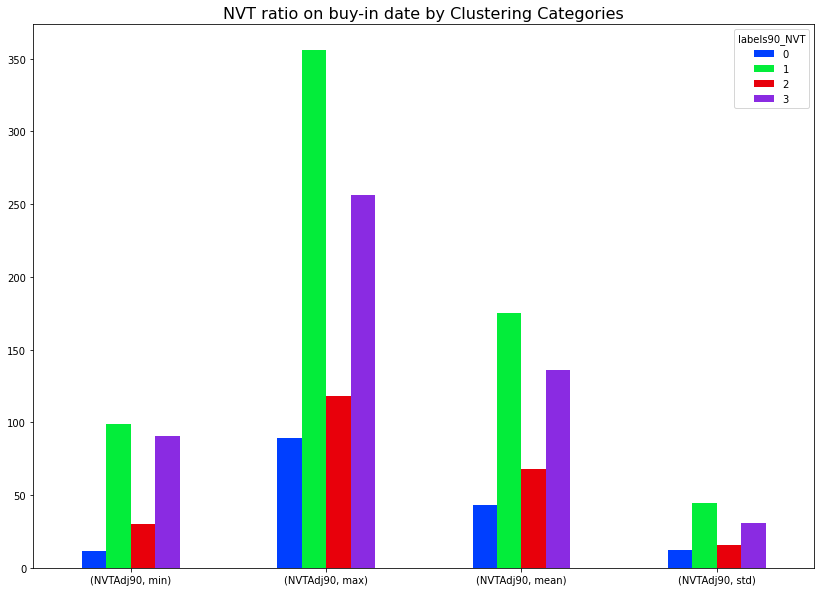

In [75]:
df90_NVT.iloc[0:4].plot(kind='bar',figsize=(14, 10))
plt.title('NVT ratio on buy-in date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('90NVT_full_buyin')

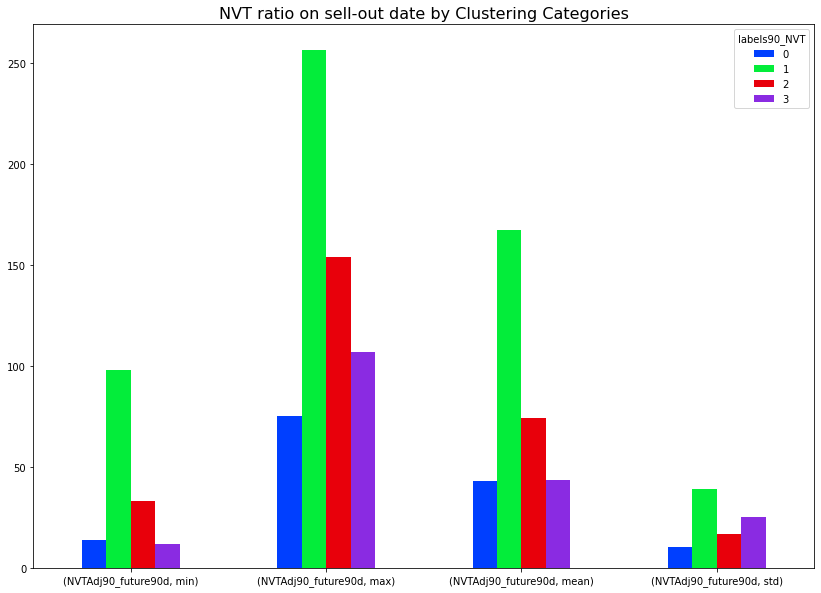

In [76]:
df90_NVT.iloc[4:8].plot(kind='bar',figsize=(14, 10))
plt.title('NVT ratio on sell-out date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('90NVT_full_sellout')

In [77]:
df_90_ROI=df_90_ROI.transpose()
df_90_ROI.columns=['labels90_NVT=0', 'labels90_NVT=1','labels90_NVT=2', 'labels90_NVT=3']
df_90_ROI.head()

,labels90_NVT=0,labels90_NVT=1,labels90_NVT=2,labels90_NVT=3
future90d_ROI_min,-83.710800,102.243083,-56.859098,-76.415609
future90d_ROI_max,2173.169200,3171.652729,2258.089533,1053.449720
future90d_ROI_mean,66.553373,537.587934,83.324950,116.571633
future90d_ROI_std,190.975457,592.692882,300.529637,195.832346


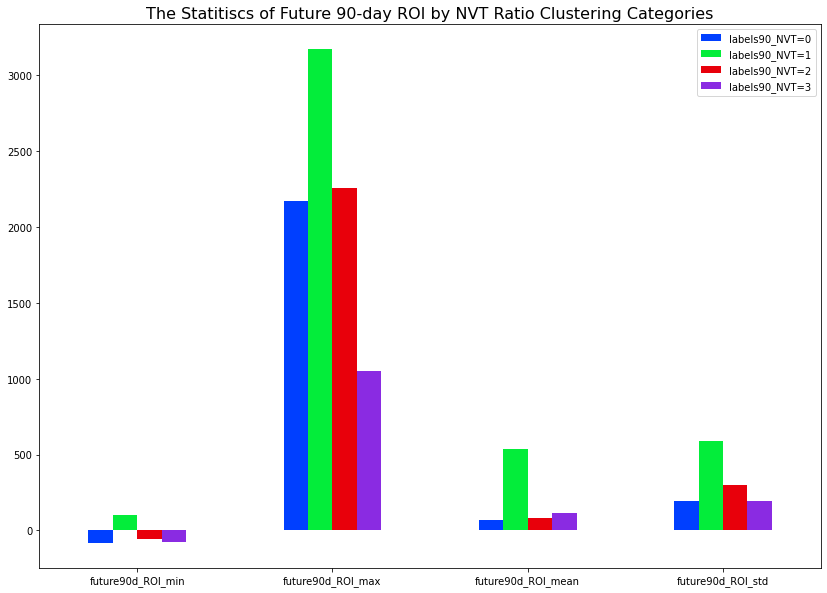

In [78]:
df_90_ROI.plot(kind='bar',figsize=(14, 10))
plt.title('The Statitiscs of Future 90-day ROI by NVT Ratio Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('90ROI_full_NVT')

In [79]:
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_90[['PM','PM_future90d']])
labels90 = model.predict(df_90[['PM','PM_future90d']])
labels90.reshape(-1,1)
df_90['labels90']=labels90
df_90.head()

,PU Ratio,PU_future90d,NVTAdj90,NVTAdj90_future90d,future90d_ROI,PM,PM_future90d,labels90,labels90_NVT
2010-10-15,0.463020,0.973481,154.643925,147.755297,202.476190,30.998689,10.989619,1,1
2010-10-16,0.418576,1.519027,144.681892,184.130860,296.029709,11.602674,15.203635,1,1
2010-10-17,0.434648,1.393589,147.263082,175.883298,278.431373,18.085074,19.008926,1,1
2010-10-18,0.432816,1.387447,145.972987,174.852775,277.724609,11.418262,17.167769,1,1
2010-10-19,0.391168,1.125454,137.869691,156.588954,258.296568,4.899486,19.007623,0,1


In [80]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids=pd.DataFrame(centroids)
centroids.columns=['centroids_x','centroids_y']
centroids.head()

,centroids_x,centroids_y
0,1.451989,1.331826
1,19.782012,7.853274
2,113.940949,18.528135
3,51.694165,14.142391


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

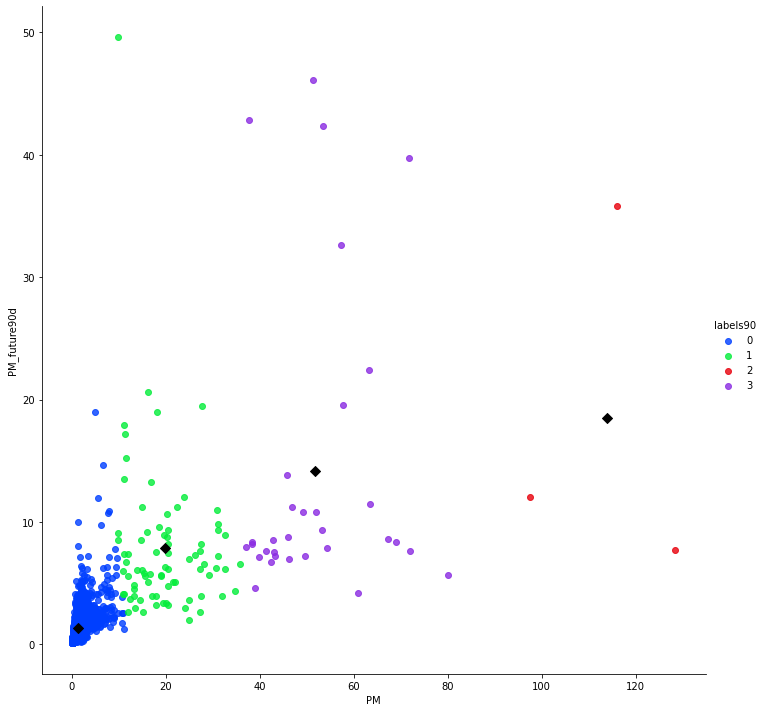

In [81]:
plt.figure(figsize=(14, 10))
sns.lmplot('PM','PM_future90d', data=df_90, hue='labels90', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.savefig('PM90_full')

In [82]:
df_90_ROI=df_90[['future90d_ROI','labels90']].groupby('labels90', as_index=False).agg(['min', 'max','mean','std'])
df_90_ROI.columns = ["_".join(x) for x in df_90_ROI.columns.ravel()]
df_90_ROI.index.name=None
df_90_ROI.head()

,future90d_ROI_min,future90d_ROI_max,future90d_ROI_mean,future90d_ROI_std
0,-83.710800,3171.652729,82.507299,267.653950
1,58.665282,654.520264,255.238370,115.198540
2,102.243083,265.269561,179.493701,81.846918
3,124.929316,391.235202,261.056437,72.786283


In [83]:
df90_PM=df_90[['PM','PM_future90d','labels90']].groupby('labels90').agg(['min', 'max','mean','std'])
df90_PM=df90_PM.transpose()
df90_PM

labels90                   0          1           2          3
PM           min    0.081659   9.833799   97.428060  37.052913
             max   11.224044  35.803533  128.418139  80.100067
             mean   1.451989  19.782012  113.940949  51.694165
             std    1.415466   7.027061   15.595009  11.667708
PM_future90d min    0.081659   1.973925    7.747271   4.213835
             max   19.007623  49.639999   35.803533  46.100227
             mean   1.331826   7.853274   18.528135  14.142391
             std    1.178312   6.241299   15.113659  12.325864

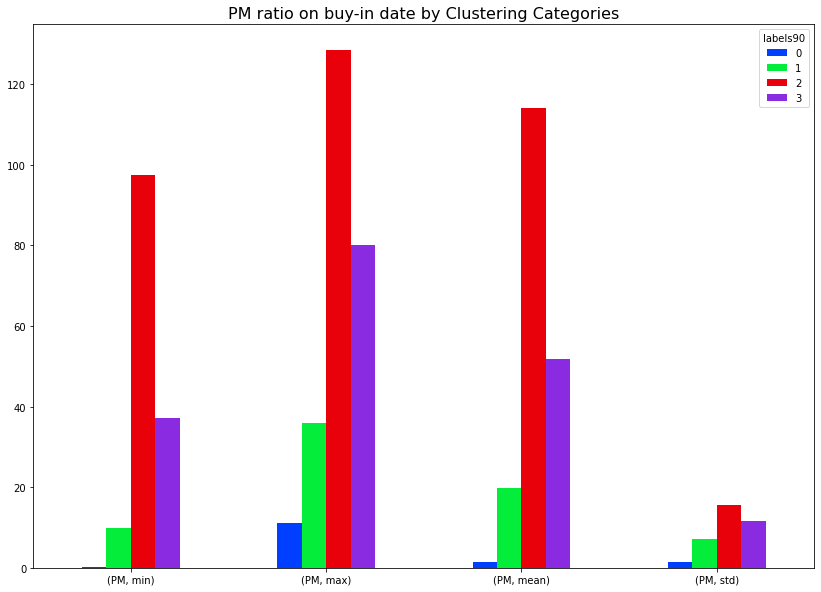

In [84]:
df90_PM.iloc[0:4].plot(kind='bar',figsize=(14, 10))
plt.title('PM ratio on buy-in date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('90PM_full_buyin')

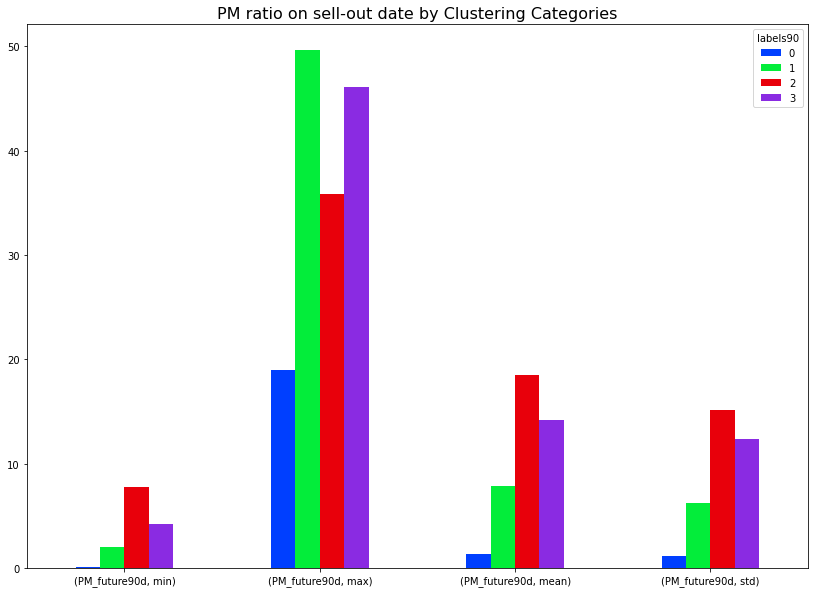

In [85]:
df90_PM.iloc[4:8].plot(kind='bar',figsize=(14, 10))
plt.title('PM ratio on sell-out date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('90PM_full_sell-out')

In [86]:
df_90_ROI=df_90_ROI.transpose()
df_90_ROI.columns=['labels90=0', 'labels90=1','labels90=2', 'labels90=3']
df_90_ROI.head()

,labels90=0,labels90=1,labels90=2,labels90=3
future90d_ROI_min,-83.710800,58.665282,102.243083,124.929316
future90d_ROI_max,3171.652729,654.520264,265.269561,391.235202
future90d_ROI_mean,82.507299,255.238370,179.493701,261.056437
future90d_ROI_std,267.653950,115.198540,81.846918,72.786283


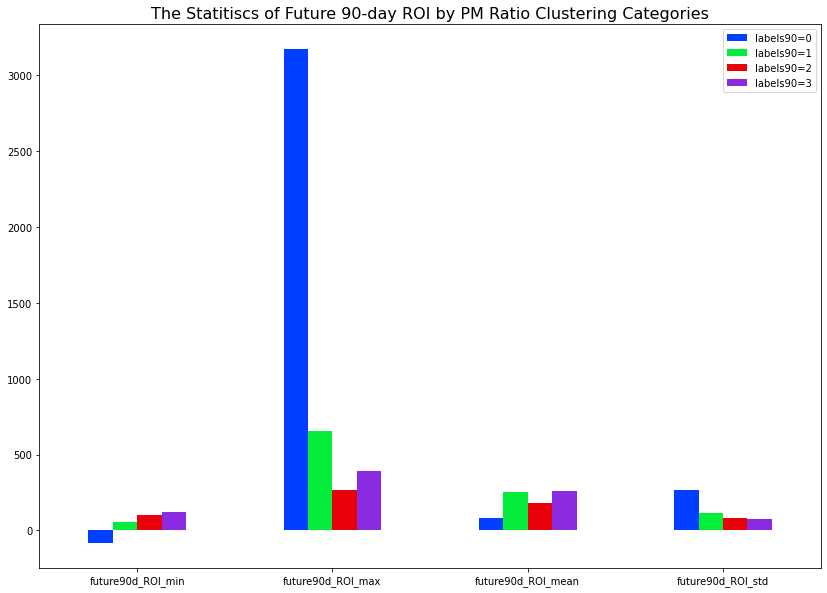

In [87]:
df_90_ROI.plot(kind='bar',figsize=(14, 10))
plt.title('The Statitiscs of Future 90-day ROI by PM Ratio Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('90ROI_fullPM')

In [88]:
df.to_csv('btc_Kmeans_2020_07_05.csv')